<AxesSubplot:xlabel='Date'>

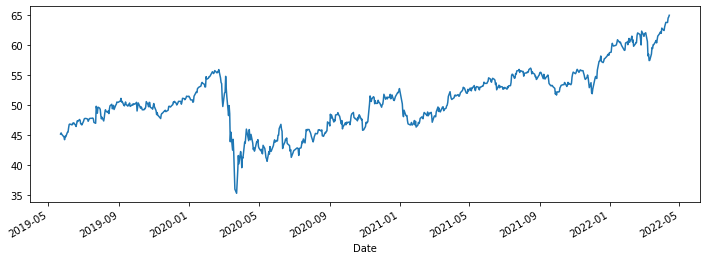

In [1]:
#!pip install yfinance
import yfinance as yf
tickerS = "KO"
tickerData = yf.Ticker(tickerS)
tickerDf = tickerData.history(start = '2019-05-23', end = '2022-04-17', interval="1d", actions=False)
tickerDf.Close.plot(figsize=(12, 4))

In [2]:
def traiding(high_train, low_train, high_test, low_test, close, l):
    all_profit = 0
    profit = 0
    pos = False
    num_steps = len(close)
    deals = []
    comission = 0.04
    for step in range(num_steps):
        buy_price = low_train[step]*l
        sell_price = high_train[step]*l
        if buy_price >= low_test[step]:
            pos = True
            profit -= comission /100 * buy_price
        if pos:
            if sell_price <= high_test[step]:
                p = sell_price-buy_price
                status = 'succes'
                #print("_________________________________________________________")
            else:
                sell_price = close[step]
                p = sell_price*(1-comission/100)-buy_price
                if p<=0:
                    status = 'failed'
                else:
                    status = 'ыбыбыб'
            profit += p
            pos = False
            deals.append({'status' : status, 'buy_price' : buy_price, 'sell_price' : sell_price, 'profit' : p})
    return deals

In [3]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

def regressor(highs):
    x = high[high.columns[1:]]#.values
    y = high[high.columns[0]]#.values.reshape(-1,1)
    high_x_train, high_x_test, high_train, high_test = train_test_split(x, y, test_size=0.33, random_state = 42, shuffle = False)
    catboost_high = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.03,
                                   depth=8,
                                   l2_leaf_reg=7,
                                   loss_function='MAE')
    catboost_high.fit(high_x_train, high_train)
    return catboost_high, high_x_test, high_test

def inversion(a, high_min, lambda_high, high1):
    #inv_high_test_from_minmax_to_diff = inv_minmax(a.reshape(-1,1), high_min)
    #inv_high_test_from_diff_to_boxcox = inv_diff(high1, inv_high_test_from_minmax_to_diff.reshape(-1))
    #inv_high_test = inv_boxcox(inv_high_test_from_diff_to_boxcox.reshape(-1), lambda_high)
    inv_high_test = inv_diff(high1, a.reshape(-1))
    return inv_high_test

def boxcoxMy(data, columnOld, columnNew):
    trans, lambda_ = boxcox(data[columnOld].values)
    data[columnNew] = trans
    return lambda_

def inv_boxcoxMyforLag(data, lambda_, columnOld, columnNew):
    #data[columnNew] = inv_boxcox(data[columnOld].values, lambda_)
    #data[columnNew].plot()
    data[columnOld] = inv_boxcox(data[columnOld].values, lambda_)
    
def inv_box_cox(data, lambda_):
    return inv_boxcox(data, lambda_)
    
def diff(data, columnOld, columnNew):
    data[columnNew] = data[columnOld].diff()
    #data[columnNew].plot()
    
def inv_diff(high1, high_test):
    return high1[len(high1) - len(high_test)-1:-1]+high_test

def anotherDiff(data, columnOld, columnNew):
    data[columnNew] = data[columnOld].pct_change()
    #data[columnNew].plot()

def minmax(data, columnOld, columnNew):
    scaler = MinMaxScaler()
    data[columnNew] = scaler.fit_transform(data[columnOld].values.reshape(-1,1))
    #data[columnNew].plot()
    return scaler.fit(data[columnOld].values.reshape(-1,1))

def inv_minmax(data, obj):
    #scaler = MinMaxScaler()
    #scaler = scaler.fit(data[columnOld].values.reshape(-1,1))
    #data[columnNew] = scaler.inverse_transform(data[columnOld].values.reshape(-1,1))
    #data[columnOld] = scaler.inverse_transform(data[columnOld].values.reshape(-1,1))
    return obj.inverse_transform(data).reshape(-1,1)
    
def lag_fich(data, prediction_columns):
    for i in range(1, prediction_window+1):
        col_name = f'shift_{i}'
        prediction_columns.append(col_name)
        data[col_name] = data[prediction_columns[0]].shift(i)
    #data.plot()
    return data[prediction_columns].dropna()

def metrics(inv_high_x, inv_high_test):
    from sklearn.metrics import mean_squared_error
    print('mean_squared_error', mean_squared_error(inv_high_x,inv_high_test))

    from sklearn.metrics import mean_absolute_error
    print('mean_absolute_error',mean_absolute_error(inv_high_test, inv_high_x))

    from sklearn.metrics import mean_absolute_percentage_error
    print('mean_absolute_percentage_error',mean_absolute_percentage_error(inv_high_test, inv_high_x))
    
def company(data, columnOld, columnNew):
    data[columnNew] = data[columnOld].diff().dropna()
    
def new_fich(data, data_column, fich, fich_column, lag):
    for i in range(1, lag+1):
        data[data_column+str(i)] = fich[fich_column].shift(i)
    #print(data)#.dropna()

In [4]:
CPB = yf.Ticker('CPB').history(period = '3y').copy()
MCD = yf.Ticker('MCD').history(period = '3y').copy()
GOOG = yf.Ticker('GOOG').history(period = '3y').copy()
SBUX = yf.Ticker('SBUX').history(period = '3y').copy()
AMZN = yf.Ticker('AMZN').history(period = '3y').copy()
FB = yf.Ticker('FB').history(period = '3y').copy()
TSLA = yf.Ticker('TSLA').history(period = '3y').copy()
CAG = yf.Ticker('CAG').history(period = '3y').copy()
C = yf.Ticker('C').history(period = '3y').copy()
KHC = yf.Ticker('KHC').history(period = '3y').copy()
HRL = yf.Ticker('HRL').history(period = '3y').copy()
PEP = yf.Ticker('PEP').history(period = '3y').copy()
DPZ = yf.Ticker('DPZ').history(period = '3y').copy()
YUM = yf.Ticker('YUM').history(period = '3y').copy()
MKC = yf.Ticker('MKC').history(period = '3y').copy()

In [5]:
company(CPB, 'High', 'diff_High')
company(MCD, 'High', 'diff_High')
company(GOOG, 'High', 'diff_High')
company(SBUX, 'High', 'diff_High')
company(AMZN, 'High', 'diff_High')
company(FB, 'High', 'diff_High')
company(TSLA, 'High', 'diff_High')
company(CAG, 'High', 'diff_High')
company(C, 'High', 'diff_High')
company(KHC, 'High', 'diff_High')
company(HRL, 'High', 'diff_High')
company(PEP, 'High', 'diff_High')
company(DPZ, 'High', 'diff_High')
company(YUM, 'High', 'diff_High')
company(MKC, 'High', 'diff_High')

In [6]:
company(CPB, 'Low', 'diff_Low')
company(MCD, 'Low', 'diff_Low')
company(GOOG, 'Low', 'diff_Low')
company(SBUX, 'Low', 'diff_Low')
company(AMZN, 'Low', 'diff_Low')
company(FB, 'Low', 'diff_Low')
company(TSLA, 'Low', 'diff_Low')
company(CAG, 'Low', 'diff_Low')
company(C, 'Low', 'diff_Low')
company(KHC, 'Low', 'diff_Low')
company(HRL, 'Low', 'diff_Low')
company(PEP, 'Low', 'diff_Low')
company(DPZ, 'Low', 'diff_Low')
company(YUM, 'Low', 'diff_Low')
company(MKC, 'Low', 'diff_Low')

In [7]:
lag = 20

#tickerDf = tickerDf.reset_index()

low = tickerDf.copy()
high = tickerDf.copy()
close = tickerDf.copy()

#lambda_high = boxcoxMy(high, 'High', 'boxcox')
#lambda_low = boxcoxMy(low, 'Low', 'boxcox')
#lambda_close =boxcoxMy(close, 'Close', 'boxcox')
high1 = high['High'].values[lag:].copy()
low1 = low['Low'].values[lag:].copy()

diff(high, 'High', 'diff')
diff(low, 'Low', 'diff')
#diff(close, 'boxcox', 'diff')
#anotherDiff(close, 'Close', 'anotherDiff')
#high_min = minmax(high, 'diff', 'minmax_scaler')
#low_min = minmax(low, 'diff', 'minmax_scaler')
#minmax(close, 'boxcox', 'minmax_scaler')

In [8]:
prediction_window = lag
prediction_columns = ['Close']
close = lag_fich(close, prediction_columns)

prediction_window = lag
prediction_columns = ['diff']
high = lag_fich(high, prediction_columns)
prediction_window = lag
prediction_columns = ['diff']
low = lag_fich(low, prediction_columns)

In [9]:
volume = tickerDf.copy()
diff(volume, 'Volume', 'diff')
new_fich(high, 'volume', volume, 'diff', lag)

new_fich(high, 'CPB', CPB, 'diff_High', lag)
new_fich(high, 'MCD', MCD, 'diff_High', lag)
new_fich(high, 'GOOG', GOOG, 'diff_High', lag)
new_fich(high, 'SBUX', SBUX, 'diff_High', lag)
new_fich(high, 'AMZN', AMZN, 'diff_High', lag)
new_fich(high, 'FB', FB, 'diff_High', lag)
new_fich(high, 'TSLA', TSLA,'diff_High', lag)
new_fich(high, 'CAG', CAG, 'diff_High', lag)
new_fich(high, 'C', C,'diff_High', lag)
new_fich(high, 'KHC', KHC,'diff_High', lag)
new_fich(high, 'HRL', HRL, 'diff_High', lag)
new_fich(high, 'PEP', PEP, 'diff_High', lag)
new_fich(high, 'DPZ', DPZ, 'diff_High', lag)
new_fich(high, 'YUM', YUM, 'diff_High', lag)
new_fich(high, 'MKC', MKC, 'diff_High', lag)

In [10]:
new_fich(low, 'volume', volume, 'diff', lag)
new_fich(low, 'CPB', CPB, 'diff_Low', lag)
new_fich(low, 'MCD', MCD, 'diff_Low', lag)
new_fich(low, 'GOOG', GOOG, 'diff_Low', lag)
new_fich(low, 'SBUX', SBUX, 'diff_Low', lag)
new_fich(low, 'AMZN', AMZN, 'diff_Low', lag)
new_fich(low, 'FB', FB, 'diff_Low', lag)
new_fich(low, 'TSLA', TSLA,'diff_Low', lag)
new_fich(low, 'CAG', CAG, 'diff_Low', lag)
new_fich(low, 'C', C,'diff_Low', lag)
new_fich(low, 'KHC', KHC,'diff_Low', lag)
new_fich(low, 'HRL', HRL, 'diff_Low', lag)
new_fich(low, 'PEP', PEP, 'diff_Low', lag)
new_fich(low, 'DPZ', DPZ, 'diff_Low', lag)
new_fich(low, 'YUM', YUM, 'diff_Low', lag)
new_fich(low, 'MKC', MKC, 'diff_Low', lag)

In [11]:
regressor_high, high_x_test, high_test = regressor(high)

0:	learn: 0.4292154	total: 319ms	remaining: 5m 18s
1:	learn: 0.4256797	total: 469ms	remaining: 3m 54s
2:	learn: 0.4211551	total: 618ms	remaining: 3m 25s
3:	learn: 0.4171039	total: 766ms	remaining: 3m 10s
4:	learn: 0.4132929	total: 919ms	remaining: 3m 2s
5:	learn: 0.4083160	total: 1.06s	remaining: 2m 56s
6:	learn: 0.4051431	total: 1.21s	remaining: 2m 52s
7:	learn: 0.4010804	total: 1.36s	remaining: 2m 48s
8:	learn: 0.3973094	total: 1.52s	remaining: 2m 47s
9:	learn: 0.3917108	total: 1.67s	remaining: 2m 45s
10:	learn: 0.3870367	total: 1.83s	remaining: 2m 44s
11:	learn: 0.3837885	total: 2s	remaining: 2m 44s
12:	learn: 0.3811195	total: 2.15s	remaining: 2m 43s
13:	learn: 0.3780903	total: 2.31s	remaining: 2m 42s
14:	learn: 0.3744979	total: 2.45s	remaining: 2m 40s
15:	learn: 0.3701833	total: 2.6s	remaining: 2m 39s
16:	learn: 0.3668115	total: 2.75s	remaining: 2m 39s
17:	learn: 0.3631346	total: 2.9s	remaining: 2m 38s
18:	learn: 0.3610211	total: 3.05s	remaining: 2m 37s
19:	learn: 0.3579142	total: 

158:	learn: 0.1108821	total: 29.5s	remaining: 2m 35s
159:	learn: 0.1101205	total: 29.6s	remaining: 2m 35s
160:	learn: 0.1093661	total: 29.8s	remaining: 2m 35s
161:	learn: 0.1088958	total: 30s	remaining: 2m 34s
162:	learn: 0.1080034	total: 30.1s	remaining: 2m 34s
163:	learn: 0.1070429	total: 30.3s	remaining: 2m 34s
164:	learn: 0.1062473	total: 30.4s	remaining: 2m 33s
165:	learn: 0.1050071	total: 30.6s	remaining: 2m 33s
166:	learn: 0.1045371	total: 30.8s	remaining: 2m 33s
167:	learn: 0.1038715	total: 30.9s	remaining: 2m 33s
168:	learn: 0.1031277	total: 31.1s	remaining: 2m 32s
169:	learn: 0.1022532	total: 31.2s	remaining: 2m 32s
170:	learn: 0.1014316	total: 31.4s	remaining: 2m 32s
171:	learn: 0.1006552	total: 31.5s	remaining: 2m 31s
172:	learn: 0.1000034	total: 31.7s	remaining: 2m 31s
173:	learn: 0.0992224	total: 31.9s	remaining: 2m 31s
174:	learn: 0.0985855	total: 32s	remaining: 2m 31s
175:	learn: 0.0982260	total: 32.2s	remaining: 2m 30s
176:	learn: 0.0977602	total: 32.4s	remaining: 2m 3

315:	learn: 0.0397171	total: 55.7s	remaining: 2m
316:	learn: 0.0393498	total: 55.8s	remaining: 2m
317:	learn: 0.0391438	total: 56s	remaining: 2m
318:	learn: 0.0390164	total: 56.2s	remaining: 1m 59s
319:	learn: 0.0387964	total: 56.3s	remaining: 1m 59s
320:	learn: 0.0385779	total: 56.5s	remaining: 1m 59s
321:	learn: 0.0383958	total: 56.6s	remaining: 1m 59s
322:	learn: 0.0381537	total: 56.8s	remaining: 1m 59s
323:	learn: 0.0381133	total: 56.9s	remaining: 1m 58s
324:	learn: 0.0379376	total: 57.1s	remaining: 1m 58s
325:	learn: 0.0376570	total: 57.3s	remaining: 1m 58s
326:	learn: 0.0373625	total: 57.4s	remaining: 1m 58s
327:	learn: 0.0369150	total: 57.6s	remaining: 1m 57s
328:	learn: 0.0368375	total: 57.8s	remaining: 1m 57s
329:	learn: 0.0367433	total: 57.9s	remaining: 1m 57s
330:	learn: 0.0366066	total: 58.1s	remaining: 1m 57s
331:	learn: 0.0364565	total: 58.2s	remaining: 1m 57s
332:	learn: 0.0363701	total: 58.4s	remaining: 1m 56s
333:	learn: 0.0362022	total: 58.5s	remaining: 1m 56s
334:	le

471:	learn: 0.0203603	total: 1m 20s	remaining: 1m 30s
472:	learn: 0.0203211	total: 1m 20s	remaining: 1m 30s
473:	learn: 0.0202203	total: 1m 21s	remaining: 1m 29s
474:	learn: 0.0201927	total: 1m 21s	remaining: 1m 29s
475:	learn: 0.0201220	total: 1m 21s	remaining: 1m 29s
476:	learn: 0.0200702	total: 1m 21s	remaining: 1m 29s
477:	learn: 0.0200114	total: 1m 21s	remaining: 1m 29s
478:	learn: 0.0199724	total: 1m 21s	remaining: 1m 29s
479:	learn: 0.0199170	total: 1m 22s	remaining: 1m 28s
480:	learn: 0.0198342	total: 1m 22s	remaining: 1m 28s
481:	learn: 0.0197808	total: 1m 22s	remaining: 1m 28s
482:	learn: 0.0197485	total: 1m 22s	remaining: 1m 28s
483:	learn: 0.0197085	total: 1m 22s	remaining: 1m 28s
484:	learn: 0.0196644	total: 1m 22s	remaining: 1m 28s
485:	learn: 0.0194771	total: 1m 23s	remaining: 1m 27s
486:	learn: 0.0194422	total: 1m 23s	remaining: 1m 27s
487:	learn: 0.0193767	total: 1m 23s	remaining: 1m 27s
488:	learn: 0.0193653	total: 1m 23s	remaining: 1m 27s
489:	learn: 0.0193282	total:

625:	learn: 0.0123053	total: 1m 47s	remaining: 1m 4s
626:	learn: 0.0122894	total: 1m 47s	remaining: 1m 3s
627:	learn: 0.0122403	total: 1m 47s	remaining: 1m 3s
628:	learn: 0.0122325	total: 1m 47s	remaining: 1m 3s
629:	learn: 0.0121417	total: 1m 48s	remaining: 1m 3s
630:	learn: 0.0121068	total: 1m 48s	remaining: 1m 3s
631:	learn: 0.0120849	total: 1m 48s	remaining: 1m 3s
632:	learn: 0.0120653	total: 1m 48s	remaining: 1m 2s
633:	learn: 0.0119513	total: 1m 48s	remaining: 1m 2s
634:	learn: 0.0119333	total: 1m 48s	remaining: 1m 2s
635:	learn: 0.0119012	total: 1m 49s	remaining: 1m 2s
636:	learn: 0.0118511	total: 1m 49s	remaining: 1m 2s
637:	learn: 0.0118248	total: 1m 49s	remaining: 1m 2s
638:	learn: 0.0117853	total: 1m 49s	remaining: 1m 1s
639:	learn: 0.0117735	total: 1m 49s	remaining: 1m 1s
640:	learn: 0.0116868	total: 1m 49s	remaining: 1m 1s
641:	learn: 0.0116648	total: 1m 50s	remaining: 1m 1s
642:	learn: 0.0116425	total: 1m 50s	remaining: 1m 1s
643:	learn: 0.0116351	total: 1m 50s	remaining:

784:	learn: 0.0080714	total: 2m 11s	remaining: 36s
785:	learn: 0.0080622	total: 2m 11s	remaining: 35.8s
786:	learn: 0.0080369	total: 2m 11s	remaining: 35.6s
787:	learn: 0.0080281	total: 2m 11s	remaining: 35.5s
788:	learn: 0.0080222	total: 2m 11s	remaining: 35.3s
789:	learn: 0.0080202	total: 2m 12s	remaining: 35.1s
790:	learn: 0.0080105	total: 2m 12s	remaining: 35s
791:	learn: 0.0079753	total: 2m 12s	remaining: 34.8s
792:	learn: 0.0079683	total: 2m 12s	remaining: 34.6s
793:	learn: 0.0079592	total: 2m 12s	remaining: 34.4s
794:	learn: 0.0079498	total: 2m 12s	remaining: 34.3s
795:	learn: 0.0079401	total: 2m 13s	remaining: 34.1s
796:	learn: 0.0079263	total: 2m 13s	remaining: 33.9s
797:	learn: 0.0078943	total: 2m 13s	remaining: 33.7s
798:	learn: 0.0078862	total: 2m 13s	remaining: 33.6s
799:	learn: 0.0078796	total: 2m 13s	remaining: 33.4s
800:	learn: 0.0078564	total: 2m 13s	remaining: 33.2s
801:	learn: 0.0078190	total: 2m 13s	remaining: 33.1s
802:	learn: 0.0077929	total: 2m 14s	remaining: 32.

940:	learn: 0.0055906	total: 2m 34s	remaining: 9.67s
941:	learn: 0.0055802	total: 2m 34s	remaining: 9.51s
942:	learn: 0.0055699	total: 2m 34s	remaining: 9.34s
943:	learn: 0.0055650	total: 2m 34s	remaining: 9.18s
944:	learn: 0.0055408	total: 2m 34s	remaining: 9.02s
945:	learn: 0.0055300	total: 2m 35s	remaining: 8.85s
946:	learn: 0.0055220	total: 2m 35s	remaining: 8.69s
947:	learn: 0.0055210	total: 2m 35s	remaining: 8.52s
948:	learn: 0.0055163	total: 2m 35s	remaining: 8.36s
949:	learn: 0.0054965	total: 2m 35s	remaining: 8.19s
950:	learn: 0.0054933	total: 2m 35s	remaining: 8.03s
951:	learn: 0.0054811	total: 2m 35s	remaining: 7.86s
952:	learn: 0.0054745	total: 2m 36s	remaining: 7.7s
953:	learn: 0.0054671	total: 2m 36s	remaining: 7.53s
954:	learn: 0.0054615	total: 2m 36s	remaining: 7.37s
955:	learn: 0.0054395	total: 2m 36s	remaining: 7.2s
956:	learn: 0.0054332	total: 2m 36s	remaining: 7.04s
957:	learn: 0.0054262	total: 2m 36s	remaining: 6.88s
958:	learn: 0.0054099	total: 2m 36s	remaining: 6

<AxesSubplot:>

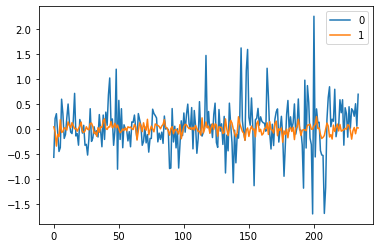

In [12]:
import pandas as pd
df = pd.DataFrame([high_test.values, regressor_high.predict(high_x_test)]).T
df.plot()

In [13]:
#inv_high_test = inversion(high_test.values, high_min, lambda_high, high1)
#inv_high_x = inversion(regressor_high.predict(high_x_test), high_min, lambda_high, high1)

inv_high_test = inversion(high_test.values, high1, high1, high1)
inv_high_x = inversion(regressor_high.predict(high_x_test), high1, high1, high1)

<AxesSubplot:xlabel='Date', ylabel='Price $'>

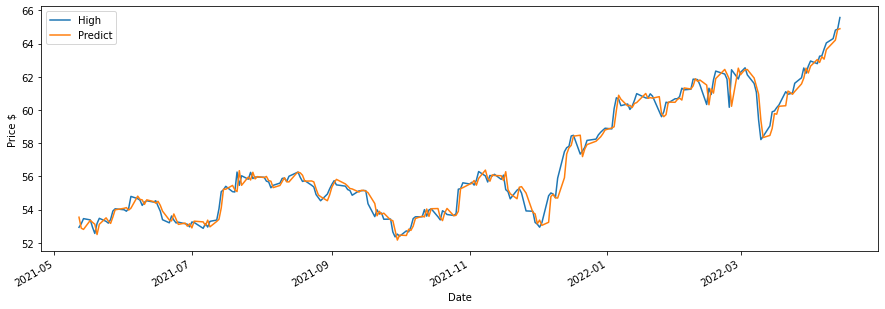

In [14]:
df = pd.DataFrame([tickerDf['High'][-len(inv_high_x):]]).T
df['Predict'] = inv_high_x
df[:].plot(ylabel='Price $',figsize=(15,5))

<AxesSubplot:xlabel='Date', ylabel='Price $'>

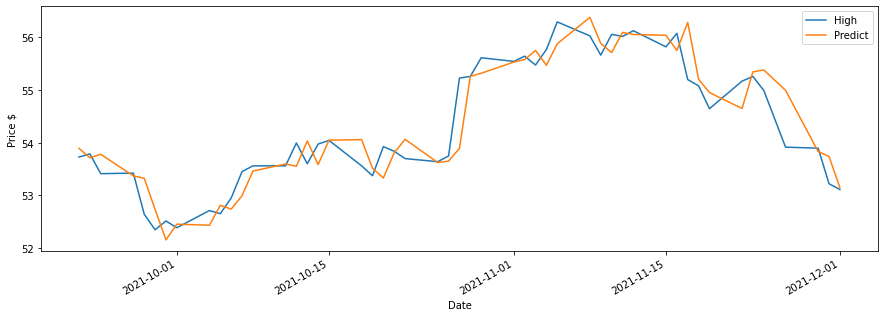

In [15]:
df = pd.DataFrame([tickerDf['High'][-len(inv_high_x):]]).T
df['Predict'] = inv_high_x
df[-len(inv_high_x)//2-25:-len(inv_high_x)//2+25].plot(ylabel='Price $',figsize=(15,5))

<AxesSubplot:>

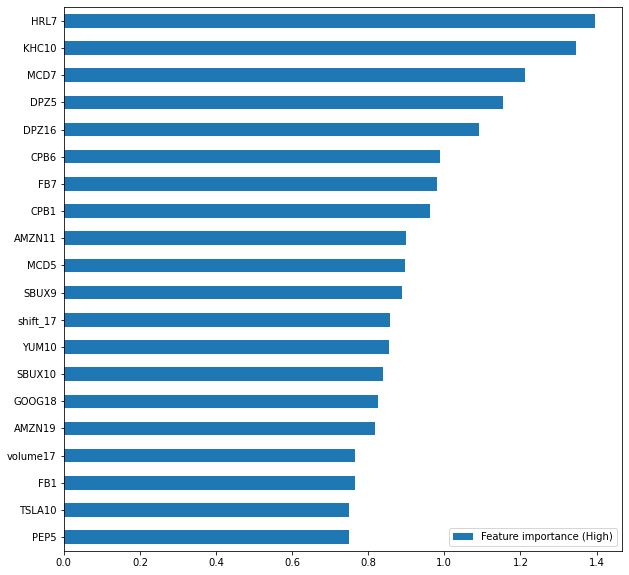

In [16]:
df_features_high = pd.DataFrame(regressor_high.get_feature_importance(), 
                                   index = high.columns[1:], 
                                   columns = ['Feature importance (High)'])

df_features_high = df_features_high.sort_values(by=['Feature importance (High)'])
df_features_high[-20:].plot(kind='barh', figsize=(10,10))

In [17]:
metrics(inv_high_x, inv_high_test)

mean_squared_error 0.23262204635184947
mean_absolute_error 0.3391416298633942
mean_absolute_percentage_error 0.0059396893634339224


In [18]:
regressor_low, low_x_test, low_test = regressor(low)

0:	learn: 0.4292154	total: 139ms	remaining: 2m 19s
1:	learn: 0.4256797	total: 283ms	remaining: 2m 21s
2:	learn: 0.4211551	total: 420ms	remaining: 2m 19s
3:	learn: 0.4171039	total: 566ms	remaining: 2m 20s
4:	learn: 0.4132929	total: 732ms	remaining: 2m 25s
5:	learn: 0.4083160	total: 877ms	remaining: 2m 25s
6:	learn: 0.4051431	total: 1.03s	remaining: 2m 26s
7:	learn: 0.4010804	total: 1.18s	remaining: 2m 26s
8:	learn: 0.3973094	total: 1.34s	remaining: 2m 27s
9:	learn: 0.3917108	total: 1.48s	remaining: 2m 26s
10:	learn: 0.3870367	total: 1.63s	remaining: 2m 27s
11:	learn: 0.3837885	total: 1.78s	remaining: 2m 26s
12:	learn: 0.3811195	total: 1.93s	remaining: 2m 26s
13:	learn: 0.3780903	total: 2.08s	remaining: 2m 26s
14:	learn: 0.3744979	total: 2.23s	remaining: 2m 26s
15:	learn: 0.3701833	total: 2.38s	remaining: 2m 26s
16:	learn: 0.3668115	total: 2.53s	remaining: 2m 26s
17:	learn: 0.3631346	total: 2.68s	remaining: 2m 26s
18:	learn: 0.3610211	total: 2.83s	remaining: 2m 25s
19:	learn: 0.3579142	t

158:	learn: 0.1108821	total: 24s	remaining: 2m 7s
159:	learn: 0.1101205	total: 24.2s	remaining: 2m 7s
160:	learn: 0.1093661	total: 24.4s	remaining: 2m 6s
161:	learn: 0.1088958	total: 24.5s	remaining: 2m 6s
162:	learn: 0.1080034	total: 24.7s	remaining: 2m 6s
163:	learn: 0.1070429	total: 24.8s	remaining: 2m 6s
164:	learn: 0.1062473	total: 25s	remaining: 2m 6s
165:	learn: 0.1050071	total: 25.1s	remaining: 2m 6s
166:	learn: 0.1045371	total: 25.3s	remaining: 2m 6s
167:	learn: 0.1038715	total: 25.4s	remaining: 2m 5s
168:	learn: 0.1031277	total: 25.6s	remaining: 2m 5s
169:	learn: 0.1022532	total: 25.8s	remaining: 2m 5s
170:	learn: 0.1014316	total: 26s	remaining: 2m 5s
171:	learn: 0.1006552	total: 26.1s	remaining: 2m 5s
172:	learn: 0.1000034	total: 26.3s	remaining: 2m 5s
173:	learn: 0.0992224	total: 26.5s	remaining: 2m 5s
174:	learn: 0.0985855	total: 26.6s	remaining: 2m 5s
175:	learn: 0.0982260	total: 26.8s	remaining: 2m 5s
176:	learn: 0.0977602	total: 27s	remaining: 2m 5s
177:	learn: 0.097305

316:	learn: 0.0393498	total: 49.2s	remaining: 1m 45s
317:	learn: 0.0391438	total: 49.3s	remaining: 1m 45s
318:	learn: 0.0390164	total: 49.5s	remaining: 1m 45s
319:	learn: 0.0387964	total: 49.6s	remaining: 1m 45s
320:	learn: 0.0385779	total: 49.8s	remaining: 1m 45s
321:	learn: 0.0383958	total: 49.9s	remaining: 1m 45s
322:	learn: 0.0381537	total: 50.1s	remaining: 1m 44s
323:	learn: 0.0381133	total: 50.2s	remaining: 1m 44s
324:	learn: 0.0379376	total: 50.4s	remaining: 1m 44s
325:	learn: 0.0376570	total: 50.5s	remaining: 1m 44s
326:	learn: 0.0373625	total: 50.7s	remaining: 1m 44s
327:	learn: 0.0369150	total: 50.8s	remaining: 1m 44s
328:	learn: 0.0368375	total: 51s	remaining: 1m 43s
329:	learn: 0.0367433	total: 51.2s	remaining: 1m 43s
330:	learn: 0.0366066	total: 51.3s	remaining: 1m 43s
331:	learn: 0.0364565	total: 51.5s	remaining: 1m 43s
332:	learn: 0.0363701	total: 51.7s	remaining: 1m 43s
333:	learn: 0.0362022	total: 51.9s	remaining: 1m 43s
334:	learn: 0.0359100	total: 52s	remaining: 1m 4

472:	learn: 0.0203211	total: 1m 13s	remaining: 1m 22s
473:	learn: 0.0202203	total: 1m 13s	remaining: 1m 21s
474:	learn: 0.0201927	total: 1m 14s	remaining: 1m 21s
475:	learn: 0.0201220	total: 1m 14s	remaining: 1m 21s
476:	learn: 0.0200702	total: 1m 14s	remaining: 1m 21s
477:	learn: 0.0200114	total: 1m 14s	remaining: 1m 21s
478:	learn: 0.0199724	total: 1m 14s	remaining: 1m 21s
479:	learn: 0.0199170	total: 1m 14s	remaining: 1m 20s
480:	learn: 0.0198342	total: 1m 14s	remaining: 1m 20s
481:	learn: 0.0197808	total: 1m 15s	remaining: 1m 20s
482:	learn: 0.0197485	total: 1m 15s	remaining: 1m 20s
483:	learn: 0.0197085	total: 1m 15s	remaining: 1m 20s
484:	learn: 0.0196644	total: 1m 15s	remaining: 1m 20s
485:	learn: 0.0194771	total: 1m 15s	remaining: 1m 19s
486:	learn: 0.0194422	total: 1m 15s	remaining: 1m 19s
487:	learn: 0.0193767	total: 1m 15s	remaining: 1m 19s
488:	learn: 0.0193653	total: 1m 16s	remaining: 1m 19s
489:	learn: 0.0193282	total: 1m 16s	remaining: 1m 19s
490:	learn: 0.0192891	total:

626:	learn: 0.0122894	total: 1m 38s	remaining: 58.5s
627:	learn: 0.0122403	total: 1m 38s	remaining: 58.3s
628:	learn: 0.0122325	total: 1m 38s	remaining: 58.2s
629:	learn: 0.0121417	total: 1m 38s	remaining: 58s
630:	learn: 0.0121068	total: 1m 38s	remaining: 57.9s
631:	learn: 0.0120849	total: 1m 39s	remaining: 57.7s
632:	learn: 0.0120653	total: 1m 39s	remaining: 57.6s
633:	learn: 0.0119513	total: 1m 39s	remaining: 57.4s
634:	learn: 0.0119333	total: 1m 39s	remaining: 57.3s
635:	learn: 0.0119012	total: 1m 39s	remaining: 57.1s
636:	learn: 0.0118511	total: 1m 40s	remaining: 57s
637:	learn: 0.0118248	total: 1m 40s	remaining: 56.8s
638:	learn: 0.0117853	total: 1m 40s	remaining: 56.7s
639:	learn: 0.0117735	total: 1m 40s	remaining: 56.6s
640:	learn: 0.0116868	total: 1m 40s	remaining: 56.4s
641:	learn: 0.0116648	total: 1m 40s	remaining: 56.3s
642:	learn: 0.0116425	total: 1m 41s	remaining: 56.1s
643:	learn: 0.0116351	total: 1m 41s	remaining: 56s
644:	learn: 0.0115821	total: 1m 41s	remaining: 55.8s

783:	learn: 0.0080919	total: 2m 2s	remaining: 33.7s
784:	learn: 0.0080714	total: 2m 2s	remaining: 33.5s
785:	learn: 0.0080622	total: 2m 2s	remaining: 33.4s
786:	learn: 0.0080369	total: 2m 2s	remaining: 33.2s
787:	learn: 0.0080281	total: 2m 2s	remaining: 33s
788:	learn: 0.0080222	total: 2m 2s	remaining: 32.9s
789:	learn: 0.0080202	total: 2m 3s	remaining: 32.7s
790:	learn: 0.0080105	total: 2m 3s	remaining: 32.6s
791:	learn: 0.0079753	total: 2m 3s	remaining: 32.4s
792:	learn: 0.0079683	total: 2m 3s	remaining: 32.3s
793:	learn: 0.0079592	total: 2m 3s	remaining: 32.1s
794:	learn: 0.0079498	total: 2m 3s	remaining: 31.9s
795:	learn: 0.0079401	total: 2m 4s	remaining: 31.8s
796:	learn: 0.0079263	total: 2m 4s	remaining: 31.6s
797:	learn: 0.0078943	total: 2m 4s	remaining: 31.5s
798:	learn: 0.0078862	total: 2m 4s	remaining: 31.3s
799:	learn: 0.0078796	total: 2m 4s	remaining: 31.1s
800:	learn: 0.0078564	total: 2m 4s	remaining: 31s
801:	learn: 0.0078190	total: 2m 4s	remaining: 30.8s
802:	learn: 0.00

941:	learn: 0.0055802	total: 2m 25s	remaining: 8.97s
942:	learn: 0.0055699	total: 2m 25s	remaining: 8.81s
943:	learn: 0.0055650	total: 2m 25s	remaining: 8.66s
944:	learn: 0.0055408	total: 2m 26s	remaining: 8.5s
945:	learn: 0.0055300	total: 2m 26s	remaining: 8.35s
946:	learn: 0.0055220	total: 2m 26s	remaining: 8.19s
947:	learn: 0.0055210	total: 2m 26s	remaining: 8.04s
948:	learn: 0.0055163	total: 2m 26s	remaining: 7.89s
949:	learn: 0.0054965	total: 2m 26s	remaining: 7.73s
950:	learn: 0.0054933	total: 2m 27s	remaining: 7.58s
951:	learn: 0.0054811	total: 2m 27s	remaining: 7.42s
952:	learn: 0.0054745	total: 2m 27s	remaining: 7.27s
953:	learn: 0.0054671	total: 2m 27s	remaining: 7.11s
954:	learn: 0.0054615	total: 2m 27s	remaining: 6.96s
955:	learn: 0.0054395	total: 2m 27s	remaining: 6.8s
956:	learn: 0.0054332	total: 2m 27s	remaining: 6.65s
957:	learn: 0.0054262	total: 2m 28s	remaining: 6.49s
958:	learn: 0.0054099	total: 2m 28s	remaining: 6.34s
959:	learn: 0.0054069	total: 2m 28s	remaining: 6

<AxesSubplot:>

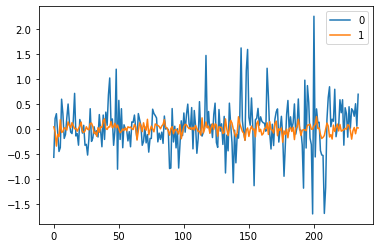

In [19]:
df = pd.DataFrame([low_test.values, regressor_low.predict(low_x_test)]).T
df.plot()

In [20]:
#inv_low_test = inversion(low_test.values, low_min, lambda_low, low1)
#inv_low_x = inversion(regressor_low.predict(low_x_test), low_min, lambda_low, low1)
inv_low_test = inversion(low_test.values, low1, low1, low1)
inv_low_x = inversion(regressor_low.predict(low_x_test), low1, low1, low1)

In [21]:
metrics(inv_low_x, inv_low_test)

mean_squared_error 0.23262204635184952
mean_absolute_error 0.3391416298633942
mean_absolute_percentage_error 0.006028283149171087


<AxesSubplot:>

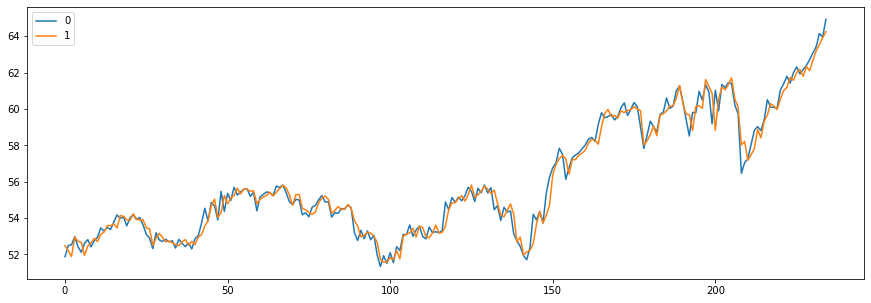

In [22]:
df = pd.DataFrame([inv_low_test, inv_low_x]).T
df[:].plot(figsize=(15,5))

In [23]:
l = 1
deals = traiding(inv_high_x, inv_low_x, inv_high_test, inv_low_test, close.Close.iloc[len(high1) - len(high_test):].values, l)
print('profit =', sum([i['profit'] for i in deals]))
deals

profit = 7.964377179462879


[{'status': 'failed',
  'buy_price': 52.47941050872828,
  'sell_price': 52.42315673828125,
  'profit': -0.07722303314233869},
 {'status': 'failed',
  'buy_price': 52.72202483827465,
  'sell_price': 52.71417999267578,
  'profit': -0.028930517595938454},
 {'status': 'failed',
  'buy_price': 52.67063900846744,
  'sell_price': 52.54926300048828,
  'profit': -0.1423957131793543},
 {'status': 'ыбыбыб',
  'buy_price': 52.625500747613444,
  'sell_price': 53.16041564941406,
  'profit': 0.5136507355408568},
 {'status': 'ыбыбыб',
  'buy_price': 52.87828843521319,
  'sell_price': 53.15071487426758,
  'profit': 0.25116615310467694},
 {'status': 'ыбыбыб',
  'buy_price': 53.57967785060011,
  'sell_price': 53.62605285644531,
  'profit': 0.024924584702624486},
 {'status': 'ыбыбыб',
  'buy_price': 53.582105695588936,
  'sell_price': 53.839473724365234,
  'profit': 0.23583223928655173},
 {'status': 'ыбыбыб',
  'buy_price': 54.12791017393569,
  'sell_price': 54.36331558227539,
  'profit': 0.21366008210679

In [24]:
print(f"{str(deals).count('succes')}/{len(deals)} successesful deals")

0/105 successesful deals


<AxesSubplot:>

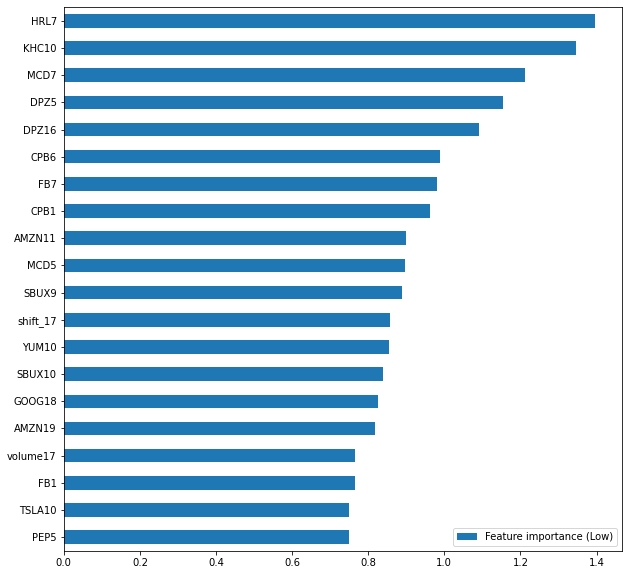

In [25]:
df_features_low = pd.DataFrame(regressor_low.get_feature_importance(), 
                                   index = low.columns[1:], 
                                   columns = ['Feature importance (Low)'])

df_features_low = df_features_low.sort_values(by=['Feature importance (Low)'])
df_features_low[-20:].plot(kind='barh', figsize=(10,10))

<AxesSubplot:xlabel='Date', ylabel='Price $'>

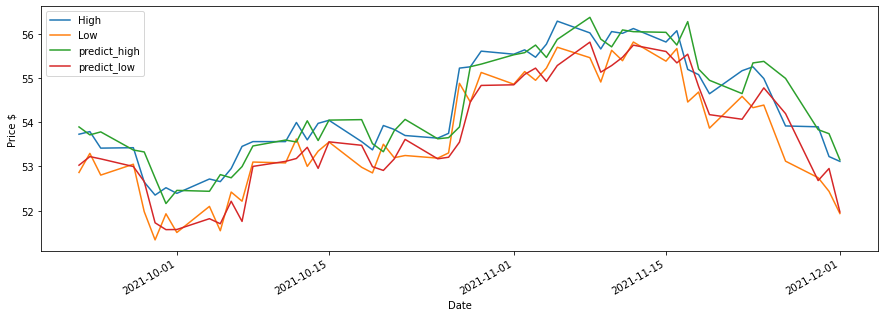

In [38]:
df = pd.DataFrame([tickerDf['High'][-len(inv_high_x):]]).T
df['Low'] = inv_low_test
df['predict_high'] = inv_high_x
df['predict_low'] = inv_low_x
df[-len(inv_high_x)//2-25:-len(inv_high_x)//2+25].plot(ylabel='Price $',figsize=(15,5))

<AxesSubplot:>

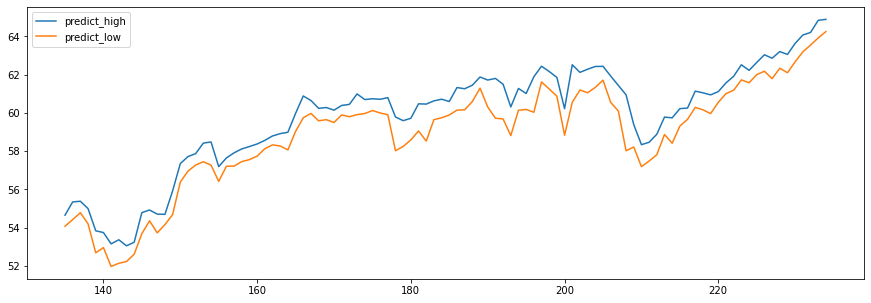

In [27]:
df = pd.DataFrame({'predict_high':inv_high_x, 'predict_low':inv_low_x})
df[-100:].plot(figsize=(15,5))